# 1. Import Modules

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 2. Load and Inspect Data

In [258]:
df = pd.read_csv('car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


# Get info about data types and null values

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


# Number of null values in each columns

In [260]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

# Data Cleaning

In [261]:
# Convert 'max_power' to numeric
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# Fill missing values by group
df['mileage(km/ltr/kg)'] = df.groupby('fuel')['mileage(km/ltr/kg)'].transform(lambda x: x.fillna(x.median()))
df['engine'] = df.groupby('fuel')['engine'].transform(lambda x: x.fillna(x.median()))
df['max_power'] = df.groupby('fuel')['max_power'].transform(lambda x: x.fillna(x.median()))
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


# EDA

In [263]:
df.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,8128.000000,8128.000000,8128.000000,8128.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,NaN,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,19.421619,1455.114296,91.322329,5.405389
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,3.985921,498.123189,35.376354,0.948874
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.800000,1197.000000,68.100000,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,82.000000,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.300000,1582.000000,101.250000,5.000000


In [264]:
#Separating Brand name and model name and dropping the name column
df['Brand'] = df['name'].str.split().str[0]
df['Model'] = df['name'].str.split().str[1:].str.join(' ')
df.sample()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Brand,Model
3340,Maruti Alto K10 2010-2014 VXI,2014,254999,40000,Petrol,Individual,Manual,Second Owner,20.92,998.0,67.1,5.0,Maruti,Alto K10 2010-2014 VXI


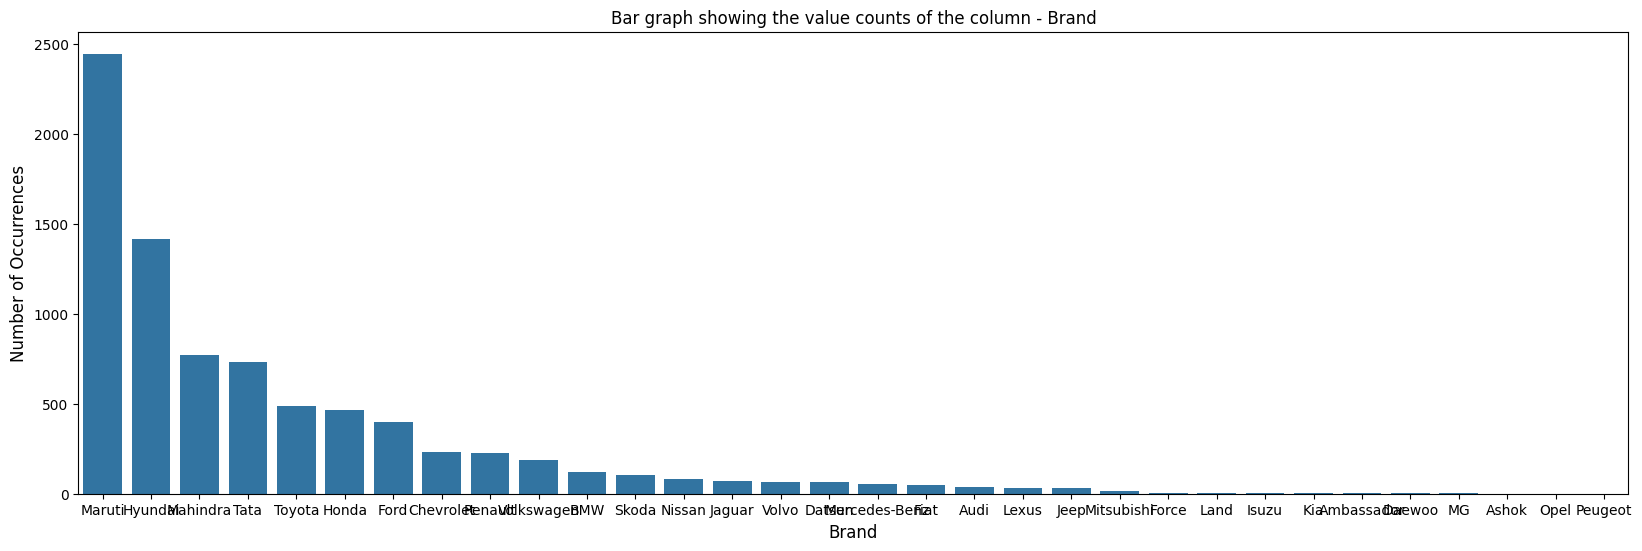

In [265]:
brand_count = df['Brand'].value_counts()
plt.figure(figsize = (20, 6))
sns.barplot(x = brand_count.index, y = brand_count.values)
plt.title('Bar graph showing the value counts of the column - Brand')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Brand', fontsize = 12)
plt.show()

In [266]:
#the number of occurences across brands are not uniformly distributed

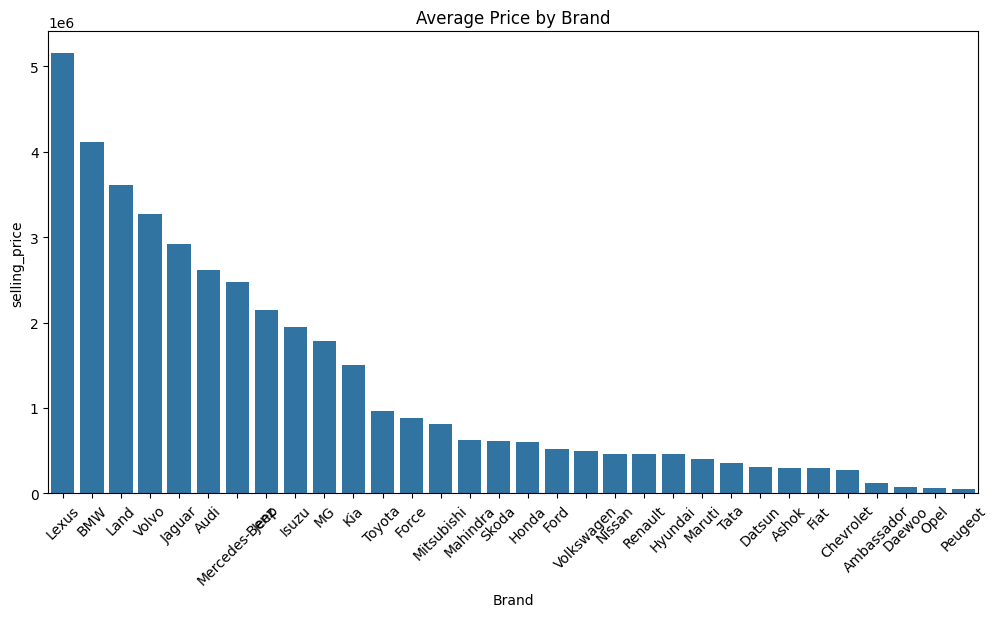

In [267]:
brand_avg = df.groupby('Brand')['selling_price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='selling_price', data=brand_avg)
plt.xticks(rotation=45)
plt.title('Average Price by Brand')
plt.show()

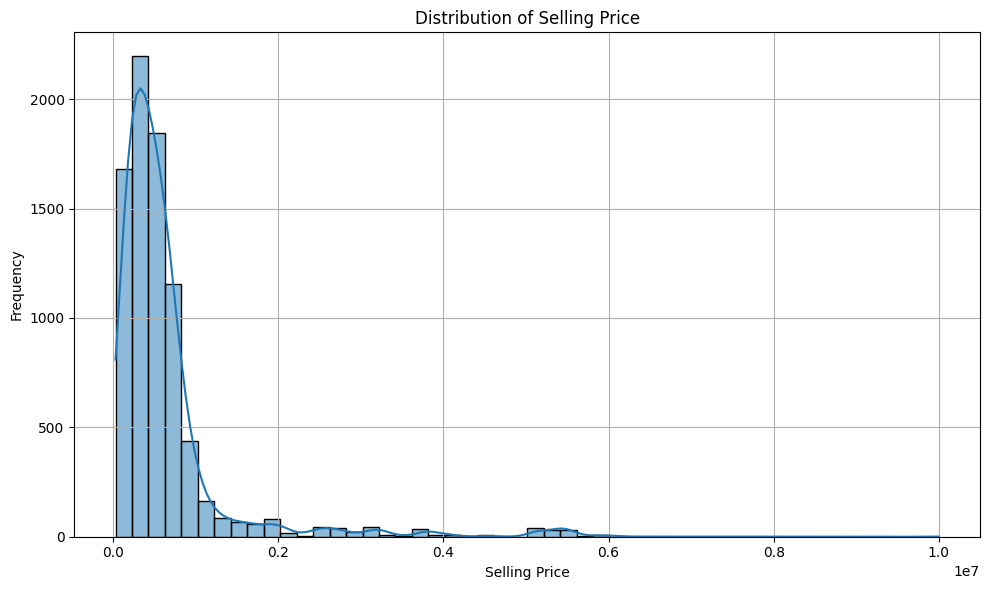

In [268]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=50)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

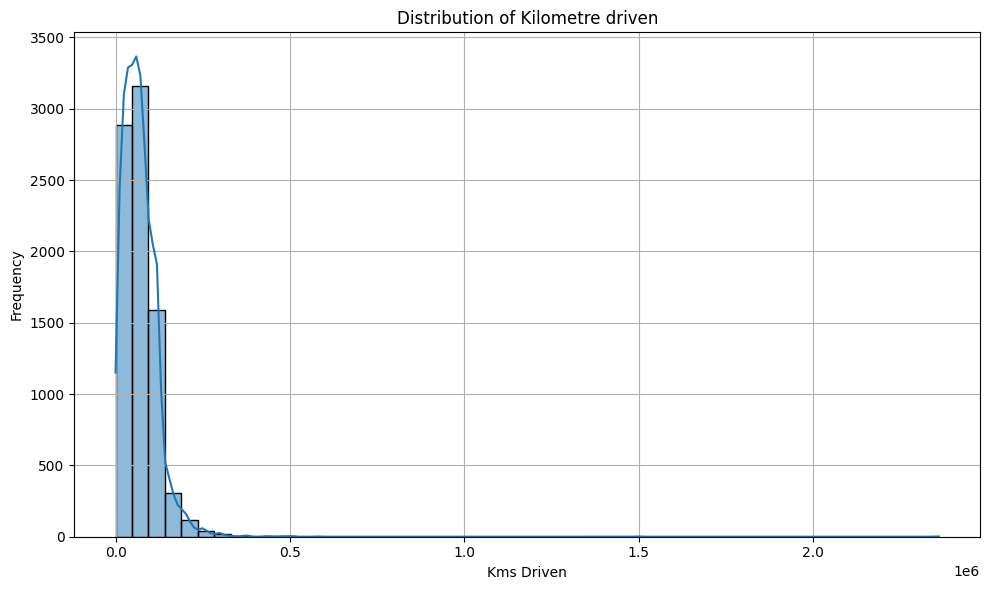

In [269]:
plt.figure(figsize=(10, 6))
sns.histplot(df['km_driven'], kde=True, bins=50)
plt.title('Distribution of Kilometre driven')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

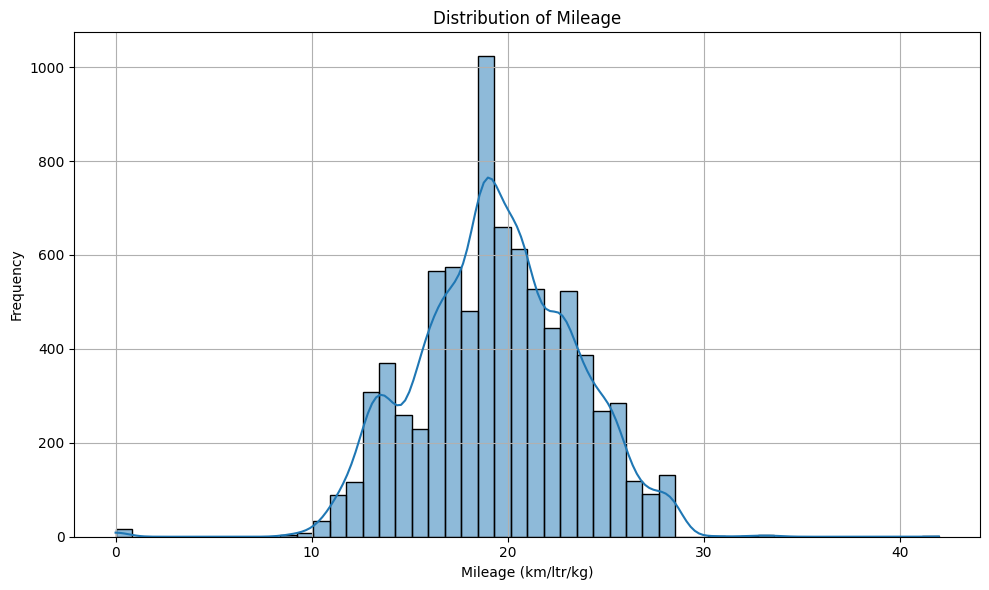

In [270]:
# Mileage Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['mileage(km/ltr/kg)'], kde=True, bins=50)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (km/ltr/kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

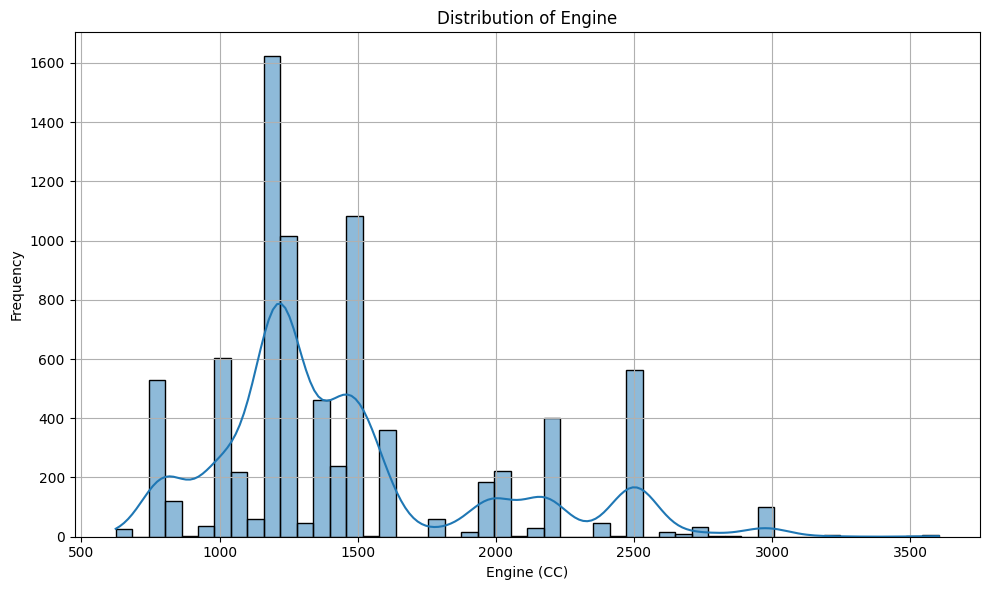

In [271]:
# Engine Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['engine'], kde=True, bins=50)
plt.title('Distribution of Engine')
plt.xlabel('Engine (CC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

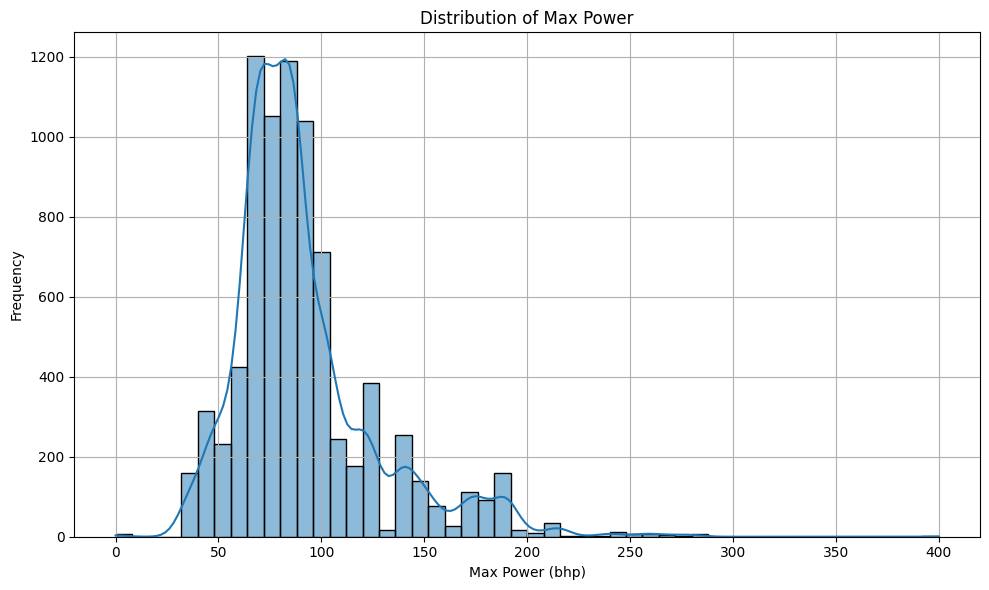

In [272]:
# Max Power Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['max_power'], kde=True, bins=50)
plt.title('Distribution of Max Power')
plt.xlabel('Max Power (bhp)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

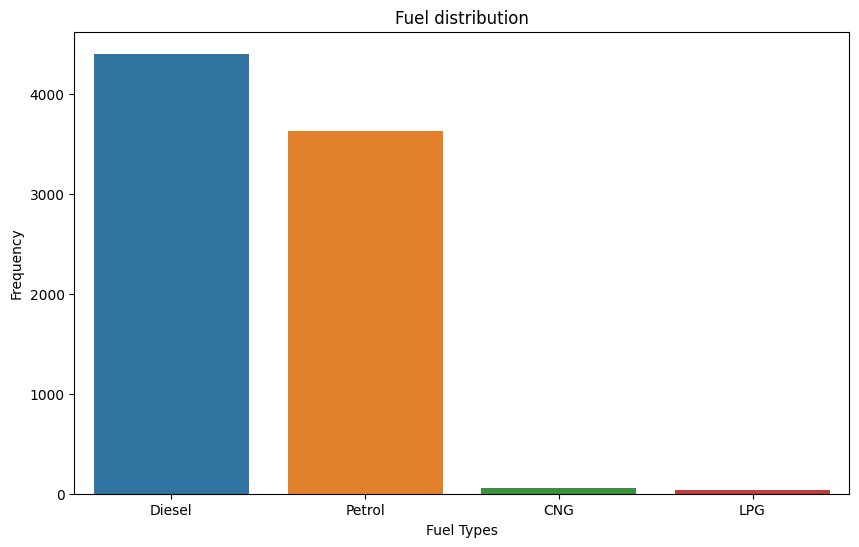

In [273]:
#Fuel type distribution
fuel_count = df['fuel'].value_counts().reset_index()
fuel_count.columns = ['fuel_type','count']
plt.figure(figsize=(10,6))
sns.barplot(data = fuel_count, x = 'fuel_type', y = 'count', hue = 'fuel_type', legend = False)
plt.title('Fuel distribution')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
plt.show()

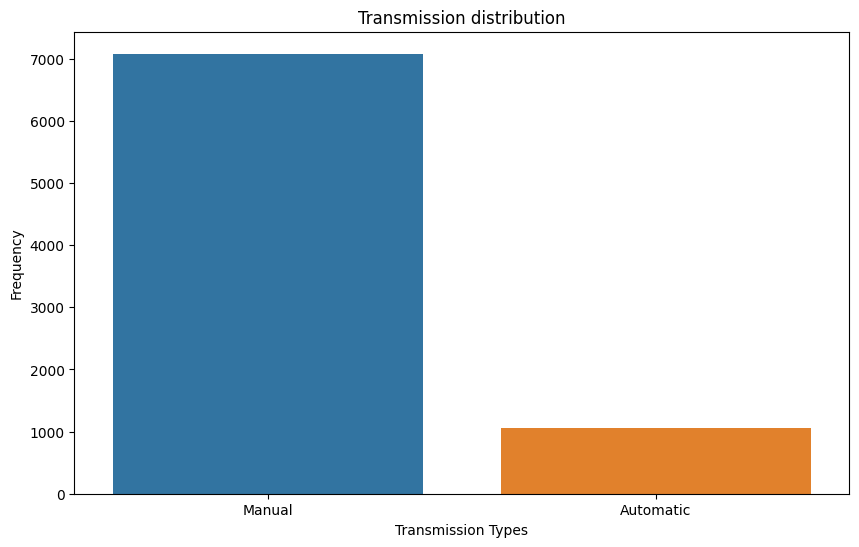

In [274]:
transmission_count = df['transmission'].value_counts().reset_index()
transmission_count.columns = ['transmission_type','count']
plt.figure(figsize=(10,6))
sns.barplot(data = transmission_count, x = 'transmission_type', y = 'count', hue = 'transmission_type', legend = False)
plt.title('Transmission distribution')
plt.xlabel('Transmission Types')
plt.ylabel('Frequency')
plt.show()

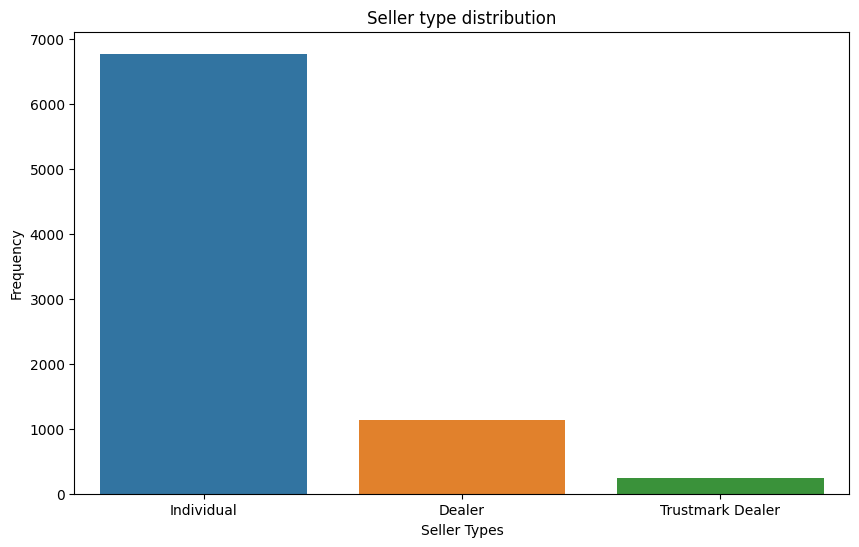

In [275]:
#Seller type distribution
seller_count = df['seller_type'].value_counts().reset_index()
seller_count.columns = ['seller_type','count']
plt.figure(figsize=(10,6))
sns.barplot(data = seller_count, x = 'seller_type', y = 'count', hue = 'seller_type', legend = False)
plt.title('Seller type distribution')
plt.xlabel('Seller Types')
plt.ylabel('Frequency')
plt.show()

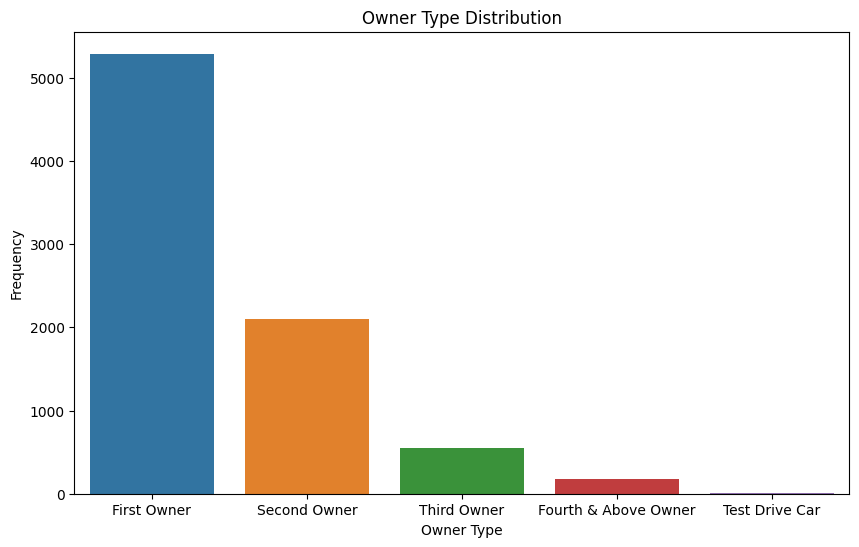

In [276]:
# Owner type distribution
owner_count = df['owner'].value_counts().reset_index()
owner_count.columns = ['owner_type', 'count']
plt.figure(figsize=(10,6))
sns.barplot(data=owner_count, x='owner_type', y='count', hue='owner_type', legend=False)
plt.title('Owner Type Distribution')
plt.xlabel('Owner Type')
plt.ylabel('Frequency')
plt.show()

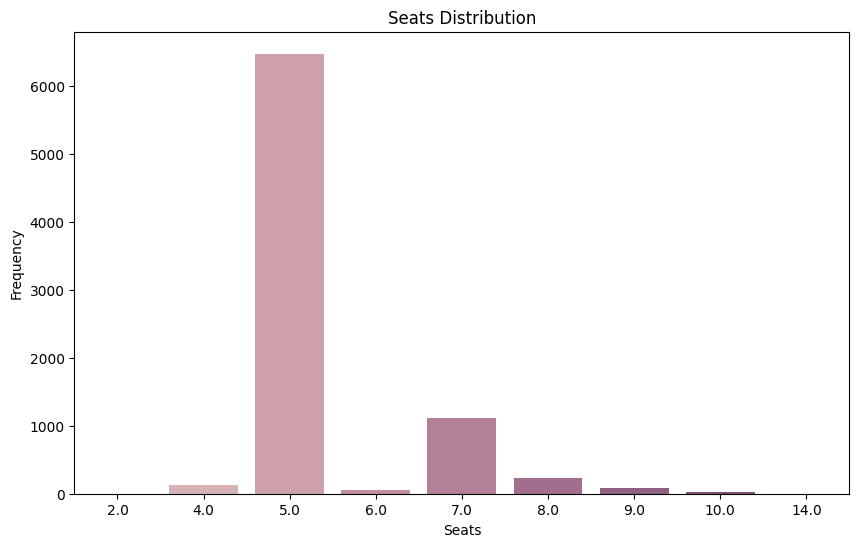

In [277]:
# Seats distribution
seats_count = df['seats'].value_counts().reset_index()
seats_count.columns = ['seats', 'count']
plt.figure(figsize=(10,6))
sns.barplot(data=seats_count, x='seats', y='count', hue='seats', legend=False)
plt.title('Seats Distribution')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()

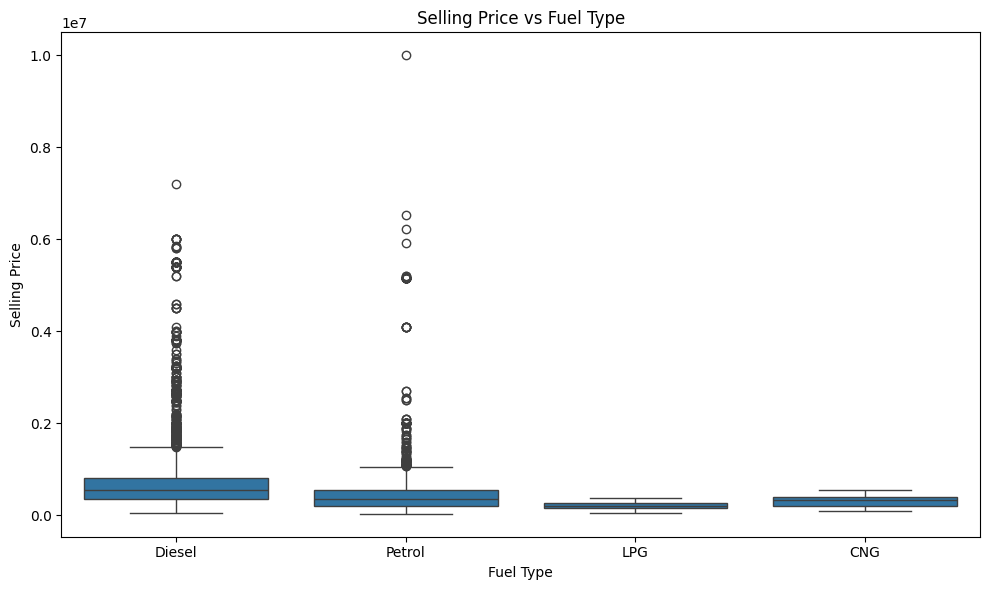

In [278]:
# Boxplot: Selling Price vs Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

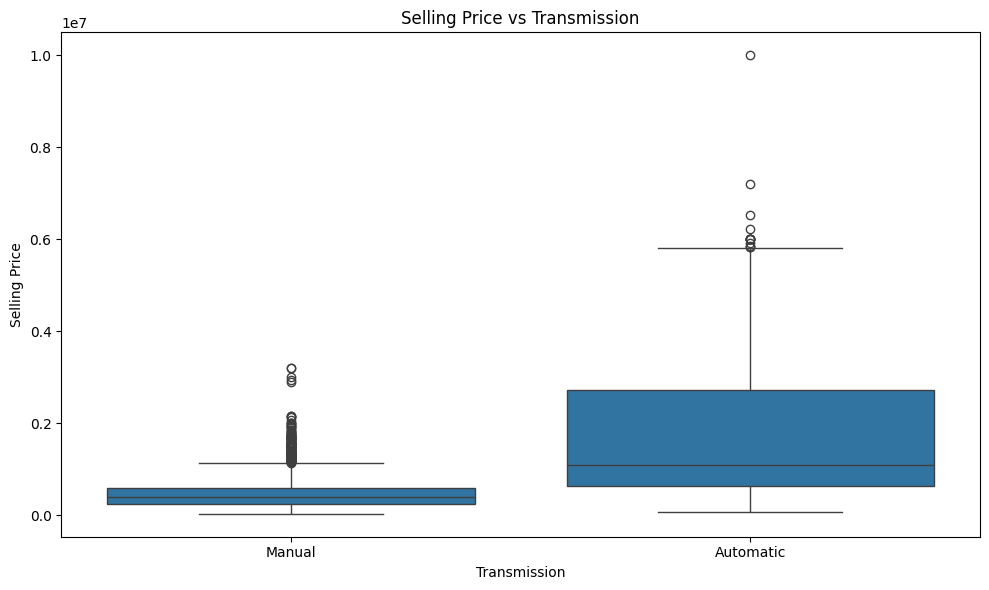

In [279]:
# Boxplot: Selling Price vs Transmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Selling Price vs Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

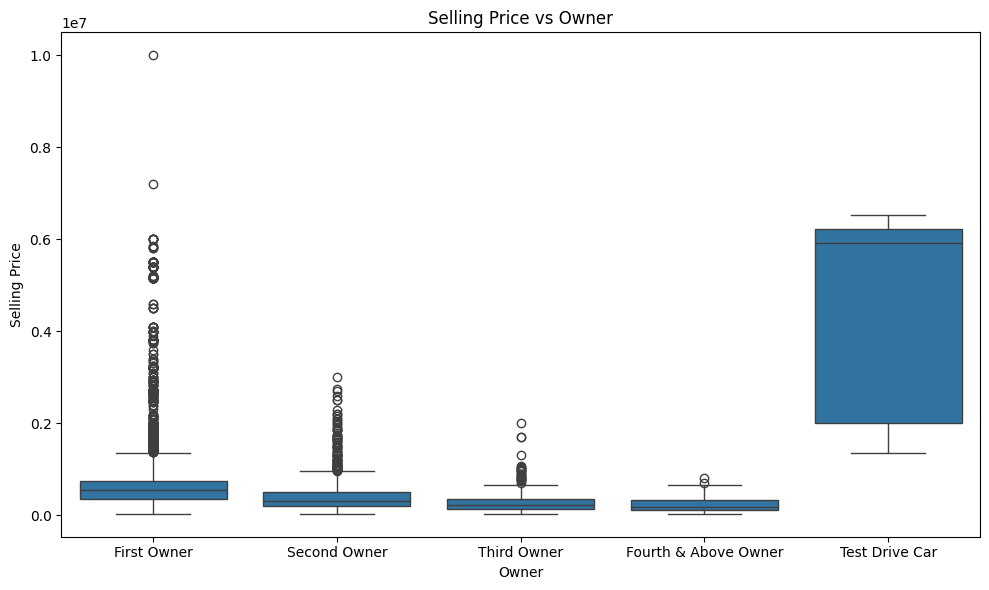

In [280]:
# Boxplot: Selling Price vs Owner
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Selling Price vs Owner')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

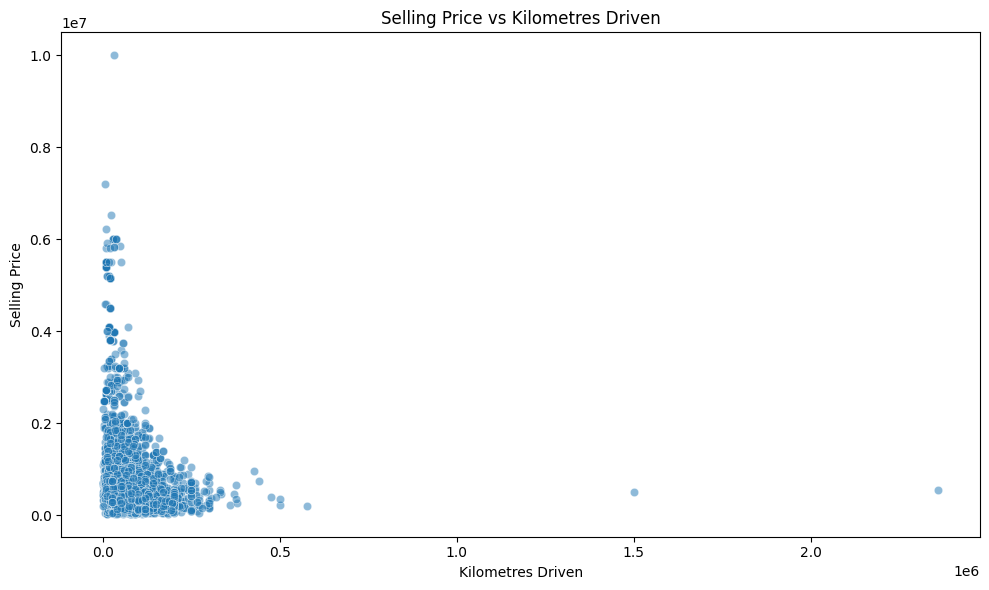

In [281]:
# Scatterplot: Selling Price vs Kilometres Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df, alpha=0.5)
plt.title('Selling Price vs Kilometres Driven')
plt.xlabel('Kilometres Driven')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

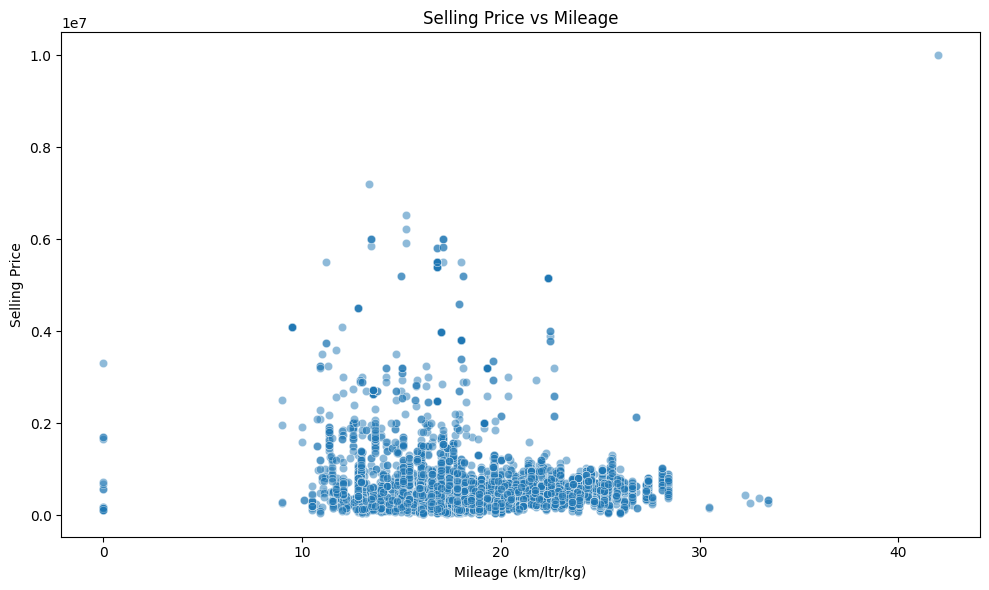

In [282]:
# Scatterplot: Selling Price vs Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage(km/ltr/kg)', y='selling_price', data=df, alpha=0.5)
plt.title('Selling Price vs Mileage')
plt.xlabel('Mileage (km/ltr/kg)')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

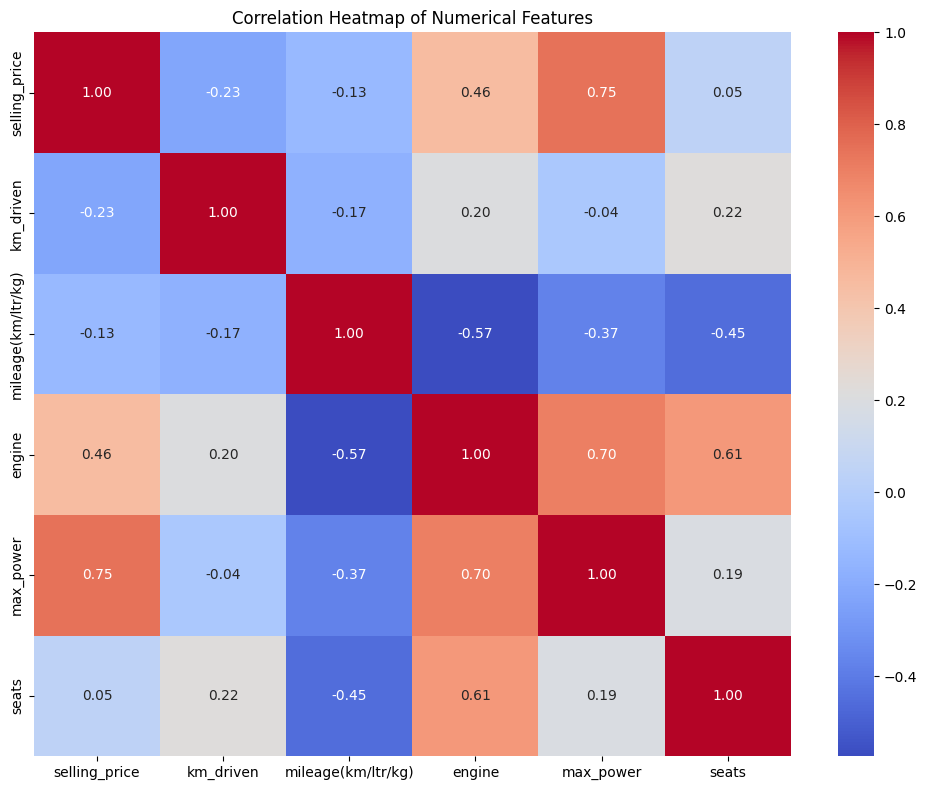

In [283]:
# Correlation Heatmap among numerical features
plt.figure(figsize=(10, 8))
numerical_cols = ['selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [284]:
df['car_age'] = 2025 - df['year']

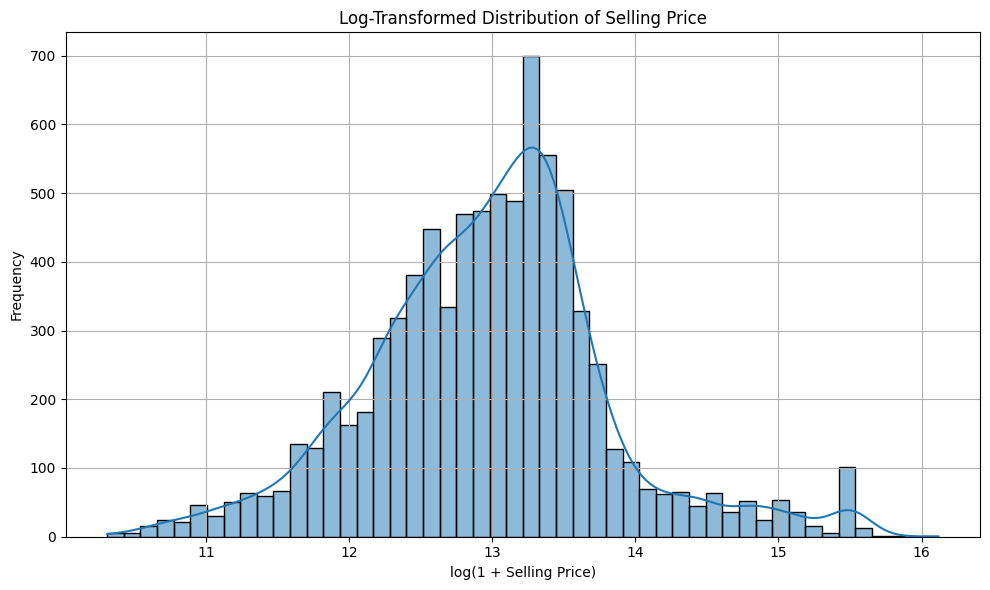

In [286]:
df['log_selling_price'] = np.log1p(df['selling_price'])
# Plot the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_selling_price'], kde=True, bins=50)
plt.title('Log-Transformed Distribution of Selling Price')
plt.xlabel('log(1 + Selling Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

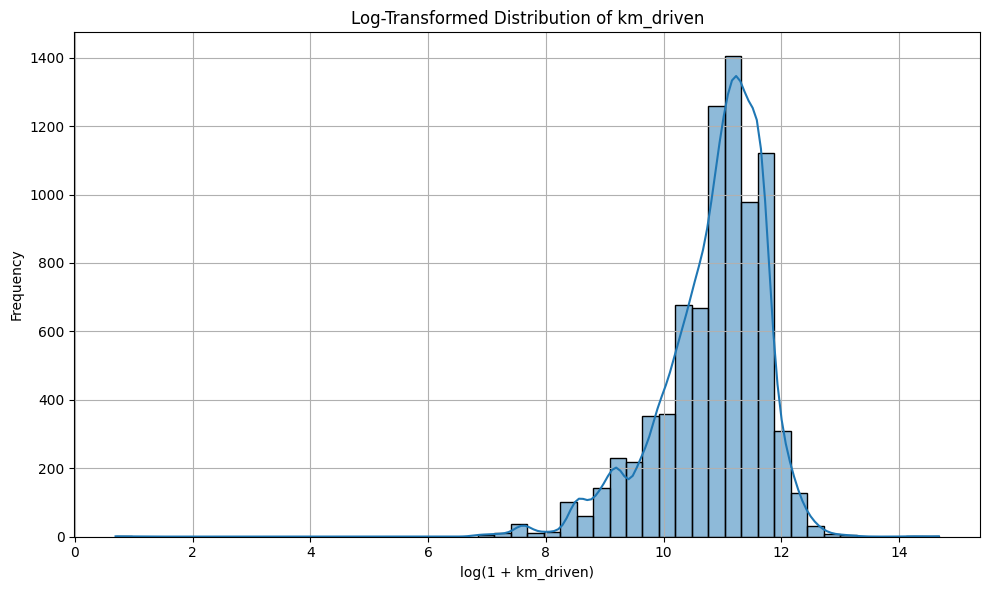

In [287]:
# Log transformation of km_driven to reduce skewness and impact of outliers
df['log_km_driven'] = np.log1p(df['km_driven'])

# Optional: visualize the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_km_driven'], kde=True, bins=50)
plt.title('Log-Transformed Distribution of km_driven')
plt.xlabel('log(1 + km_driven)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

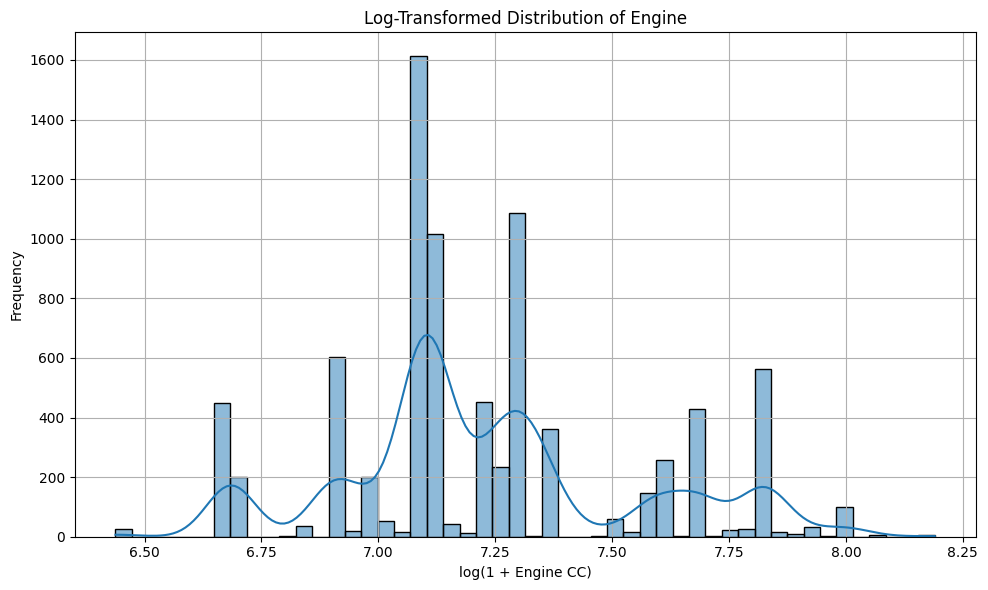

In [288]:
# Log transformation of engine to reduce skewness and impact of outliers
df['log_engine'] = np.log1p(df['engine'])

# Optional: visualize the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_engine'], kde=True, bins=50)
plt.title('Log-Transformed Distribution of Engine')
plt.xlabel('log(1 + Engine CC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [289]:
# Keep 'First Owner', 'Second Owner', 'Test Drive Car' as is, group others as 'Other'
df['owner'] = df['owner'].apply(lambda x: x if x in ['First Owner', 'Second Owner', 'Test Drive Car'] else 'Third and above')

In [290]:
# Combine rare fuel types into 'Other'
df['fuel'] = df['fuel'].apply(lambda x: x if x in ['Diesel', 'Petrol'] else 'Other')

In [291]:
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Brand,Model,car_age,log_selling_price,log_km_driven,log_engine
6551,Maruti Celerio VXI AT,2017,450000,10000,Petrol,Individual,Automatic,First Owner,23.10,998.0,67.04,5.0,Maruti,Celerio VXI AT,8,13.017005,9.210440,6.906755
5247,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177.00,5.0,Jaguar,XF 2.0 Diesel Portfolio,8,14.978662,10.714440,7.600902
6733,Tata Indica V2 eLX,2014,200000,55896,Diesel,Individual,Manual,Second Owner,25.00,1396.0,69.00,5.0,Tata,Indica V2 eLX,11,12.206078,10.931266,7.242082
2383,Tata Safari DICOR 2.2 EX 4x2,2017,625000,72000,Diesel,Individual,Manual,First Owner,13.93,2179.0,138.03,7.0,Tata,Safari DICOR 2.2 EX 4x2,8,13.345509,11.184435,7.687080
5223,Mahindra Bolero 2011-2019 SLX 2WD BSIII,2014,500000,90000,Diesel,Individual,Manual,First Owner,15.96,2523.0,62.10,7.0,Mahindra,Bolero 2011-2019 SLX 2WD BSIII,11,13.122365,11.407576,7.833600
5884,Maruti Swift ZDi,2014,390000,90000,Diesel,Individual,Manual,Second Owner,22.90,1248.0,74.00,5.0,Maruti,Swift ZDi,11,12.873905,11.407576,7.130099
3127,Hyundai Verna CRDi ABS,2007,240000,110000,Diesel,Individual,Manual,First Owner,18.10,1493.0,110.00,5.0,Hyundai,Verna CRDi ABS,18,12.388398,11.608245,7.309212
558,Nissan Micra XV CVT,2015,325000,50000,Petrol,Individual,Automatic,First Owner,19.34,1198.0,76.00,5.0,Nissan,Micra XV CVT,10,12.691584,10.819798,7.089243
583,Maruti Swift Dzire VXI 1.2,2020,730000,1500,Petrol,Individual,Manual,First Owner,21.21,1197.0,81.80,5.0,Maruti,Swift Dzire VXI 1.2,5,13.500801,7.313887,7.088409
4668,Ford EcoSport 1.5 TDCi Titanium BSIV,2015,600000,40000,Diesel,Individual,Manual,First Owner,22.77,1498.0,98.59,5.0,Ford,EcoSport 1.5 TDCi Titanium BSIV,10,13.304687,10.596660,7.312553


In [292]:
# Scaling for numerical/log-transformed columns
scale_cols = ['log_km_driven', 'log_engine', 'log_selling_price', 'car_age', 'max_power', 'mileage(km/ltr/kg)', 'seats']
scaler = StandardScaler()
for col in scale_cols:
    if col in df.columns:
        df[col + '_scaled'] = scaler.fit_transform(df[[col]])
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,...,log_selling_price,log_km_driven,log_engine,log_km_driven_scaled,log_engine_scaled,log_selling_price_scaled,car_age_scaled,max_power_scaled,mileage(km/ltr/kg)_scaled,seats_scaled
1423,Maruti Zen Estilo VXI BSIV,2012,191000,90000,Petrol,Individual,Manual,First Owner,19.00,998.0,...,12.160034,11.407576,6.906755,0.625949,-1.028706,-0.969369,0.446096,-0.684746,-0.105784,-0.427258
6194,Maruti Swift Dzire ZDi,2008,320000,175802,Diesel,Individual,Manual,Third and above,19.30,1248.0,...,12.676079,12.077119,7.130099,1.391617,-0.321302,-0.354355,1.435215,-0.492515,-0.030514,-0.427258
4188,Tata Indigo TDI,2010,409999,100000,Diesel,Individual,Manual,Second Owner,19.61,1405.0,...,12.923912,11.512935,7.248504,0.746435,0.053728,-0.058992,0.940656,-0.602765,0.047264,-0.427258
7798,Tata Aria Pure LX 4x2,2014,525000,78000,Diesel,Dealer,Manual,Second Owner,15.05,2179.0,...,13.171155,11.264477,7.687080,0.462306,1.442845,0.235667,-0.048464,1.599406,-1.096833,1.680633
185,Toyota Corolla Altis Diesel D4DG,2010,300000,60000,Diesel,Individual,Manual,First Owner,21.43,1364.0,...,12.611541,11.002117,7.218910,0.162279,-0.040007,-0.431271,0.940656,-0.116535,0.503900,-0.427258


In [293]:
# One-hot encoding for categorical columns
onehot_cols = ['Brand', 'fuel', 'seller_type', 'transmission', 'owner']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# Scaling for numerical/log-transformed columns
scale_cols = ['log_km_driven', 'log_engine', 'log_selling_price', 'car_age', 'max_power', 'mileage(km/ltr/kg)', 'seats']
scaler = StandardScaler()
for col in scale_cols:
    if col in df.columns:
        df[col + '_scaled'] = scaler.fit_transform(df[[col]])


In [294]:
df.head()

,name,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,Model,car_age,...,Brand_Volkswagen,Brand_Volvo,fuel_Other,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Second Owner,owner_Test Drive Car,owner_Third and above
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,5.0,Swift Dzire VDI,11,...,False,False,False,False,True,False,True,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,5.0,Rapid 1.5 TDI Ambition,11,...,False,False,False,False,True,False,True,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,5.0,City 2017-2020 EXi,19,...,False,False,False,True,True,False,True,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,5.0,i20 Sportz Diesel,15,...,False,False,False,False,True,False,True,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,5.0,Swift VXI BSIII,18,...,False,False,False,True,True,False,True,False,False,False


In [295]:
drop_cols = [
    'name', 'year', 'km_driven', 'engine', 'selling_price',
    'log_km_driven', 'log_engine', 'log_selling_price', 'Model',
    'mileage(km/ltr/kg)', 'max_power', 'seats', 'car_age'  
]

# Only drop columns that exist in the DataFrame
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

df.head()

,log_km_driven_scaled,log_engine_scaled,log_selling_price_scaled,car_age_scaled,max_power_scaled,mileage(km/ltr/kg)_scaled,seats_scaled,Brand_Ashok,Brand_Audi,Brand_BMW,...,Brand_Volkswagen,Brand_Volvo,fuel_Other,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Second Owner,owner_Test Drive Car,owner_Third and above
0,1.175275,-0.321302,0.051954,-0.048464,-0.489689,0.998170,-0.427258,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,0.954930,0.256594,-0.181331,-0.048464,0.344819,0.431139,-0.427258,False,False,False,...,False,False,False,False,True,False,True,True,False,False
2,1.131210,0.254481,-1.195423,1.929775,-0.376612,-0.431952,-0.427258,False,False,False,...,False,False,False,True,True,False,True,False,False,True
3,1.019764,0.033389,-0.774124,0.940656,-0.037381,0.897810,-0.427258,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,0.954930,-0.196979,-1.427891,1.682495,-0.088266,-0.833389,-0.427258,False,False,False,...,False,False,False,True,True,False,True,False,False,False


In [296]:
# Split the data into features and target
X = df.drop(columns=['log_selling_price_scaled'])  # Use all columns except the target
y = df['log_selling_price_scaled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.3121982564764728
R2 Score: 0.900948007665654


In [297]:
from sklearn.ensemble import RandomForestRegressor
# Split the data into features and target
X = df.drop(columns=['log_selling_price_scaled'])  # Use all columns except the target
y = df['log_selling_price_scaled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest RMSE: 0.2598210531263205
Random Forest R2 Score: 0.9313957617963948


In [298]:
# XGBoost Model
from xgboost import XGBRegressor

# Split the data into features and target
X = df.drop(columns=['log_selling_price_scaled'])  # Use all columns except the target
y = df['log_selling_price_scaled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2 Score:", r2_xgb)

XGBoost RMSE: 0.2500870842295692
XGBoost R2 Score: 0.9357243837595492
